# Preparando os dados para treinamento

A base de dados completa está, à partir da raiz desse repositório, em `/iris/iris.data`. São ao todo 150 exemplares de flores, divididos em 50 de Iris-setosa, 50 de Iris-versicolor e 50 de Iris-virginica. O documento da especificação do trabalho diz que a base deve ser dividida em três partições (A,B,C) de tamanho igual, levando em consideração que cada partição precisa ter aproximadamente a mesma proporção de espécies de flor. Isso será feito logo baixo. Mas antes, vamos visualizar algumas informações sobre essa base de dados.

## Visualização dos dados

Temos 5 colunas ao todo nessa base de dados, sem valores faltantes, e queremos criar modelos de aprendizado de máquina capazes de prever a quinta coluna, que é a espécie da flor. Para ser mais específico, cada coluna da amostra segue o padrão abaixo:

| Atributo              | Tipo     | Medida     | Valores Faltantes |
| --------------------- | -------- | ---------- | ----------------- |
| Comprimento da Sépala | Contínuo | cm         | Não               |
| Largura da Sépala     | Contínuo | cm         | Não               |
| Comprimento da Pétala | Contínuo | cm         | Não               |
| Largura da Pétala     | Contínuo | cm         | Não               |
| Espécie               | Alvo     | categórica | Não               |

Vamos primeiro visualizar um gráfico de dispersão da largura e comprimento das sépalas.


In [382]:
# Data setup
import pandas as pd

# Assuming the Iris dataset CSV has column headers 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'
iris = pd.read_csv('../Iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
features = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = iris['species']

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


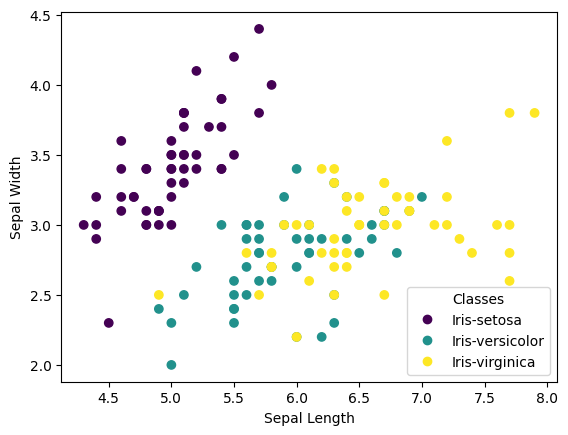

In [383]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species_encoded'] = le.fit_transform(iris['species'])

target_encoded = iris['species_encoded']

import matplotlib.pyplot as plt

# Create a scatter plot
_, ax = plt.subplots()
# just to remember, iloc selects the integer location of that feature collumn.
# for example, features.iloc[:, 0] selects all rows (exemplars) of the collumn 0
# So, in this scenario, scatter plot is basically scattering the sepal length and the sepal width
scatter = ax.scatter(features.iloc[:, 0], features.iloc[:, 1], c=target_encoded)

# Set the labels for the axes
ax.set(xlabel='Sepal Length', ylabel='Sepal Width')

# Automatically generate the legend from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")

# If you want to replace the labels with the species names from LabelEncoder
for i, text in enumerate(legend1.get_texts()):
    text.set_text(le.classes_[i])

Cada ponto no gráfico acima é uma amostra das flores no dataset, e as cores representam seus tipos. Dá para ver claramente que tem um padrão de sépalas mais curtas e largas para as do tipo Iris-setosa. Mas isso já não é tão verdade para os outros dois tipos: as flores das espécies Iris-versicolor e Iris-virginica se sobrepõem frequentemente. Talvez seja porque está sendo considerado apenas duas dimensões. Vamos ver outros gráficos de dispersão que usam as informações de outras colunas para ver os dados em outra perspectiva.

No gráfico abaixo, um gráfico de dispersão do comprimento e largura de pétalas:

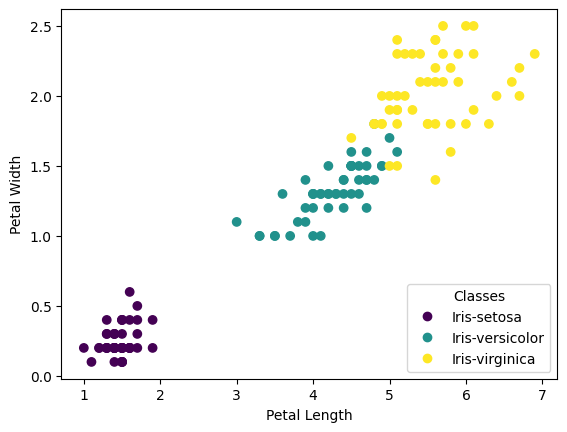

In [384]:
# Create a scatter plot
_, ax = plt.subplots()
scatter = ax.scatter(features.iloc[:, 2], features.iloc[:, 3], c=target_encoded)

ax.set(xlabel='Petal Length', ylabel='Petal Width')

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")

for i, text in enumerate(legend1.get_texts()):
    text.set_text(le.classes_[i])

Usando as medidas das pétalas, temos clusters mais concentrados de Iris-versicolor e Iris-virgniica. Nessas medidas, o tipo Iris-setosa está bem isolada do restante, sendo um outlier. Mas ainda assim existem sobreposições das amostras.

Como temos 4 dimensões de dados contínuos (largura e altura de pétalas e sépalas), podemos usar a Análise de Componentes Principais para reduzir a dimensão e remover ruídos, enquanto retemos o máximo de informação que conseguimos.



[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

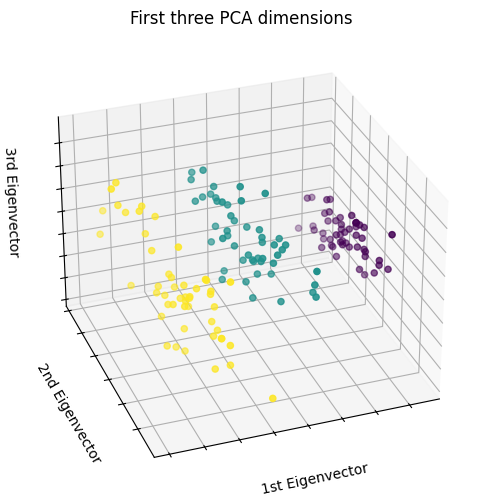

In [385]:
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Assuming 'iris' is your DataFrame and it has the species encoded numerically
features = iris.drop('species', axis=1)  # or whichever column is the target
target = iris['species_encoded']  # make sure this is the numeric target
iris['species_encoded'] = le.fit_transform(iris['species'])

# Apply PCA
X_reduced = PCA(n_components=3).fit_transform(features)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=target,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

O método ACP cria 3 novas características (Eigenvectors) que são uma combinação linear das 4 características originais. Além disso, essa transformação maximiza a variância.  Nesse gráfico, podemos ver que cada espécie pode ser praticamente identificada usando o primeiro Eigenvector. 




## Partição dos dados

É possível termos 3 partições de 50 amostras cada. Mas elas serão exatamente iguais, pois temos que ter 1/3 das amostras de cada espécie em cada partição. Mas dá para chegar bem perto disso. O código abaixo extrai uma amostra de cada espécie, até que a partição fique cheia.

In [386]:
import pandas as pd

# Carregar o dataset
iris = pd.read_csv('../Iris/iris.data', header=None)

# Definir os nomes das colunas se o CSV não tiver cabeçalho
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Criar uma lista de DataFrames, um para cada espécie
groups = [df for _, df in iris.groupby('species')]

# Inicializar as partições como listas vazias de DataFrames
partitions = [[], [], []]

# Distribuir as amostras igualmente
while any(not group.empty for group in groups):
    for i in range(3):
        if not groups[i].empty:
            for j in range(3):
                # Adicionar a primeira linha do grupo como um DataFrame na partição correspondente
                partitions[i].append(groups[j].iloc[[0]])
                # Remover a primeira linha do grupo
                groups[j] = groups[j].iloc[1:]

# Concatenar todas as listas de DataFrames para formar as partições finais
A = pd.concat(partitions[0], ignore_index=True)
B = pd.concat(partitions[1], ignore_index=True)
C = pd.concat(partitions[2], ignore_index=True)

Vamos checar se a quantidade de dados está correto e se não tem repetição nas partições entre si:

In [387]:
# Supondo que 'species' seja o nome da coluna com os tipos de flor
for i, df in enumerate([A,B,C]):
    print(f"Contagem de espécies na Partição {i+1}:")
    print(df['species'].value_counts())
    print()  # Apenas para adicionar uma linha vazia entre as partiçõe

Contagem de espécies na Partição 1:
Iris-setosa        17
Iris-versicolor    17
Iris-virginica     17
Name: species, dtype: int64

Contagem de espécies na Partição 2:
Iris-setosa        17
Iris-versicolor    17
Iris-virginica     17
Name: species, dtype: int64

Contagem de espécies na Partição 3:
Iris-setosa        16
Iris-versicolor    16
Iris-virginica     16
Name: species, dtype: int64



In [388]:
for i, df in enumerate([A, B, C]):
    print(f"Partição {i+1} tem linhas duplicadas? {'Sim' if df.duplicated().any() else 'Não'}")


Partição 1 tem linhas duplicadas? Não
Partição 2 tem linhas duplicadas? Sim
Partição 3 tem linhas duplicadas? Não


Uma coisa qu eme incomodou foram essas duplicadas na partição B, mas aparentemente elas estão no dataset principal:

In [389]:
duplicadas = B.duplicated(keep=False)
linhas_duplicadas = B[duplicadas]
print(linhas_duplicadas)

    sepal_length  sepal_width  petal_length  petal_width      species
33           4.9          3.1           1.5          0.1  Iris-setosa
36           4.9          3.1           1.5          0.1  Iris-setosa


In [390]:
duplicadas = iris.duplicated(keep=False)
linhas_duplicadas = iris[duplicadas]
print(linhas_duplicadas)

     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


Faz sentido eu remover essas duplicada da partição em que estão e colocar em uma outra:


In [391]:
duplicadas = B.duplicated(keep=False)
index_da_duplicada = duplicadas[duplicadas].index[0]

# Copie a linha duplicada para o DataFrame C
duplicated_row = B.loc[[index_da_duplicada]]
C = pd.concat([C, duplicated_row], ignore_index=True)

# Remova a linha duplicada do DataFrame original
B = B.drop(index_da_duplicada)

Pronto, agora vemos que as partições, não possuem mais duplicadas, e temos os dados um pouco melhor distribuídos:

In [392]:
for i, df in enumerate([A, B, C]):
    print(f"Partição {i+1} tem linhas duplicadas? {'Sim' if df.duplicated().any() else 'Não'}")


Partição 1 tem linhas duplicadas? Não
Partição 2 tem linhas duplicadas? Não
Partição 3 tem linhas duplicadas? Não


In [393]:
# Supondo que 'species' seja o nome da coluna com os tipos de flor
for i, df in enumerate([A,B,C]):
    print(f"Contagem de espécies na Partição {i+1}:")
    print(df['species'].value_counts())
    print()  # Apenas para adicionar uma linha vazia entre as partiçõe

Contagem de espécies na Partição 1:
Iris-setosa        17
Iris-versicolor    17
Iris-virginica     17
Name: species, dtype: int64

Contagem de espécies na Partição 2:
Iris-versicolor    17
Iris-virginica     17
Iris-setosa        16
Name: species, dtype: int64

Contagem de espécies na Partição 3:
Iris-setosa        17
Iris-versicolor    16
Iris-virginica     16
Name: species, dtype: int64

